Лабораторная работа №7
Выберите метод:
1) Метод простых итераций (метод Либмана)
2) Метод Зейделя
3) Метод простых итераций с верхней релаксацией
1


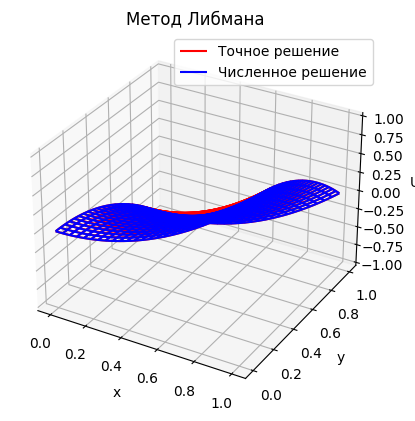

h =  0.5
h =  0.25
h =  0.125
Количество итераций методом Либмана: 71


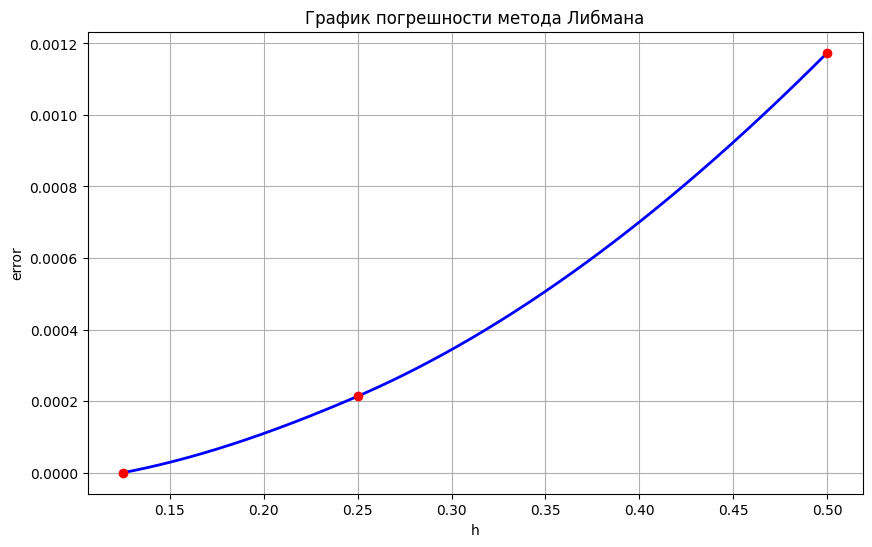

In [ ]:
import numpy as np, matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

def analyt_func(x, y):
    return x ** 2 - y ** 2

def func_border1(x, y):
    return -y**2

def func_border2(x, y):
    return 1 - y ** 2

def func_border3(x, y):
    return x**2

def func_border4(x, y):
    return x ** 2 - 1

def norm(cur_u, prev_u):
    max = 0
    for i in range(cur_u.shape[0]):
        for j in range(cur_u.shape[1]):
            if abs(cur_u[i, j] - prev_u[i, j]) > max:
                max = abs(cur_u[i, j] - prev_u[i, j])

    return max

def liebman(x, y, h, eps):
    N = len(x)
    count = 0
    prev_u = np.zeros((N, N))
    cur_u = np.zeros((N, N))

    for j in range(len(y)):
        coeff = (func_border4(x[j], y[j]) - func_border3(x[j], y[j])) / (N - 1)
        addition = func_border3(x[j], y[j])
        for i in range(len(x)):
            cur_u[i][j] = coeff * i + addition
    for i in range(1, N - 1):
        cur_u[i, 0] = func_border1(x[i], y[i])
        cur_u[i, -1] = func_border2(x[i], y[i])
    for j in range(1, N - 1):
        cur_u[0, j] = func_border3(x[j], y[j])
        cur_u[-1, j] = func_border4(x[j], y[j])


    while norm(cur_u, prev_u) > eps:
        count += 1
        prev_u = np.copy(cur_u)
        for i in range(1, N - 1):
            for j in range(1, N - 1):
                cur_u[i, j] = (prev_u[i + 1, j] + prev_u[i, j + 1] + prev_u[i - 1, j] + prev_u[i, j - 1] )/ 4

    U = np.copy(cur_u)
    return U, count

def relaxation(x, y, h, eps, tau):
    N = len(x)
    count = 0
    prev_u = np.zeros((N, N))
    cur_u = np.zeros((N, N))
    for j in range(len(y)):
        coeff = (func_border4(x[j], y[j]) - func_border3(x[j], y[j])) / (N - 1)
        addition = func_border3(x[j], y[j])
        for i in range(len(x)):
            cur_u[i][j] = coeff * i + addition
    for i in range(1, N - 1):
        cur_u[i, 0] = func_border1(x[i], y[i])
        cur_u[i, -1] = func_border2(x[i], y[i])
    for j in range(1, N - 1):
        cur_u[0, j] = func_border3(x[j], y[j])
        cur_u[-1, j] = func_border4(x[j], y[j])

    while norm(cur_u, prev_u) > eps:
        count += 1
        prev_u = np.copy(cur_u)
        for i in range(1, N - 1):
            for j in range(1, N - 1):
                cur_u[i, j] = (1 - tau) * prev_u[i, j] + tau *((prev_u[i + 1, j] + prev_u[i, j + 1] + prev_u[i - 1, j] + prev_u[i, j - 1]) / 4)
    U = np.copy(cur_u)

    return U, count

def Zeidel(x, y, h, eps, tau):
    N = len(x)
    count = 0
    prev_u = np.zeros((N, N))
    cur_u = np.zeros((N, N))

    for j in range(len(y)):
        coeff = (func_border4(x[j], y[j]) - func_border3(x[j], y[j])) / (N - 1)
        addition = func_border3(x[j], y[j])
        for i in range(len(x)):
            cur_u[i][j] = coeff * i + addition
    for i in range(1, N - 1):
        cur_u[i, 0] = func_border1(x[i], y[i])
        cur_u[i, -1] = func_border2(x[i], y[i])
    for j in range(1, N - 1):
        cur_u[0, j] = func_border3(x[j], y[j])
        cur_u[-1, j] = func_border4(x[j], y[j])

    while norm(cur_u, prev_u) > eps:
        count += 1
        prev_u = np.copy(cur_u)

        for i in range(1, N - 1):
            for j in range(1, N - 1):
                cur_u[i, j] = (1 - tau) * prev_u[i, j] + tau * (
                        (prev_u[i + 1, j] + prev_u[i, j + 1] + cur_u[i - 1, j] + cur_u[i, j - 1]) / 4)

    U = np.copy(cur_u)
    return U, count


eps = 0.0001
N = 50
tau = 0.5
h = 1 / N
h2 = h / 2
h3 = h / 4
x = np.arange(0, 1 + h / 2 - 1e-4, h)
y = np.arange(0, 1 + h / 2 - 1e-4, h)

x2 = np.arange(0, 1 + h2 / 2 - 1e-4, h)
y2 = np.arange(0, 1 + h2 / 2 - 1e-4, h)

x3 = np.arange(0, 1 + h3 / 2 - 1e-4, h)
y3 = np.arange(0, 1 + h3 / 2 - 1e-4, h)

X, Y = np.meshgrid(x, y)
X2, Y2 = np.meshgrid(x2, y2)
X3, Y3 = np.meshgrid(x3, y3)

U_analytic = analyt_func(X, Y)

print("Лабораторная работа №7")
print("Выберите метод:\n"
      "1) Метод простых итераций (метод Либмана)\n"
      "2) Метод Зейделя\n"
      "3) Метод простых итераций с верхней релаксацией")
method = int(input())
if method == 1:
    U1, count1 = liebman(x, y, h, eps)
    U2 = liebman(x, y, h2, eps)
    U3 = liebman(x, y, h3, eps)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_title("Метод Либмана")
    ax.plot_wireframe(X, Y, U_analytic, color="red", label="Точное решение")
    ax.plot_wireframe(X, Y, U1, color="blue", label="Численное решение")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("U")
    ax.legend()
    plt.show()
if method == 2:
    U1, count2 = Zeidel(x, y, h, eps, tau)
    U2 = Zeidel(x, y, h2, eps, tau)
    U3 = Zeidel(x, y, h3, eps, tau)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_title("Метод Зейделя")
    ax.plot_wireframe(X, Y, U_analytic, color="red", label="Точное решение")
    ax.plot_wireframe(X, Y, U1, color="blue", label="Численное решение")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("U")
    ax.legend()
    plt.show()
if method == 3:
    U1, count3 = relaxation(x, y, h, eps, tau)
    U2 = relaxation(x, y, h2, eps, tau)
    U3 = relaxation(x, y, h3, eps, tau)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_title("Метод простых итераций с верхней релаксацией")
    ax.plot_wireframe(X, Y, U_analytic, color="red", label="Точное решение")
    ax.plot_wireframe(X, Y, U1, color="blue", label="Численное решение")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("U")
    ax.legend()
    plt.show()

H = np.zeros(3)
E1 = np.zeros(3)
E2 = np.zeros(3)
E3 = np.zeros(3)
n = 1
for i in range(3):
    n = int(n * 2)
    h = 1 / n
    print("h = " , h)
    x = np.arange(0, 1 + h / 2 - 1e-4, h)
    y = np.arange(0, 1 + h / 2 - 1e-4, h)
    X, Y = np.meshgrid(x, y)
    U_analytic = analyt_func(X, Y)
    U1, count1 = liebman(x, y, h, eps)
    U2, count2 = Zeidel(x, y, h, eps, tau)
    U3, count3 = relaxation(x, y, h, eps, tau)
    H[i] = h
    error_x1 = []
    error_x2 = []
    error_x3 = []
    error_x4 = []

    for j in range(len(x)):
        error_x1.append(max(abs(U_analytic[:, j] - U1[:, j])))
        error_x2.append(max(abs(U_analytic[:, j] - U2[:, j])))
        error_x3.append(max(abs(U_analytic[:, j] - U3[:, j])))

    E1[i] = max(error_x1)
    E2[i] = max(error_x2)
    E3[i] = max(error_x3)

from scipy.interpolate import PchipInterpolator
X_reverse = H[::-1]

pchip_reverse1 = PchipInterpolator(X_reverse, E1)
pchip_reverse2 = PchipInterpolator(X_reverse, E2)
pchip_reverse3 = PchipInterpolator(X_reverse, E3)

xnew_reverse = np.linspace(min(X_reverse), max(X_reverse), 1000)
ynew_reverse1 = pchip_reverse1(xnew_reverse)
ynew_reverse2 = pchip_reverse2(xnew_reverse)
ynew_reverse3 = pchip_reverse3(xnew_reverse)


if method == 1:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_reverse, E1, label='', zorder=6,c = 'r')
    plt.plot(xnew_reverse, ynew_reverse1, label='', linewidth=2,c = 'b')
    plt.title('График погрешности метода Либмана')
    plt.xlabel('h')
    plt.ylabel('error')
    plt.grid(True)
    print("Количество итераций методом Либмана:", count1)
if method == 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_reverse, E2, label='', zorder=6,c = 'r')
    plt.plot(xnew_reverse, ynew_reverse2, label='', linewidth=2,c = 'b')
    plt.title('График погрешности метода Зейделя')
    plt.xlabel('h')
    plt.ylabel('error')
    plt.grid(True)
    print("Количество итераций методом Зейделя:", count2)
if method == 3:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_reverse, E3, label='', zorder=6,c = 'r')
    plt.plot(xnew_reverse, ynew_reverse3, label='', linewidth=2,c = 'b')
    plt.title('График погрешности метода простых итераций с верхней релаксацией')
    plt.xlabel('h')
    plt.ylabel('error')
    plt.grid(True)
    print("Количество итераций методом простых итераций с верхней релаксацией:", count3)

plt.show()
